In [11]:
# Kaggle Hub'ı yükleme (Colab'de gerekmeyebilir, ama garanti olsun)
!pip install kagglehub scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import kagglehub
import os
import math

In [13]:
# Kaggle veri setini indirme
dataset_ref = "masoudnickparvar/brain-tumor-mri-dataset"
path = kagglehub.dataset_download(dataset_ref)

print("Path to dataset files:", path)

# İndirilen klasör adını alıyoruz (Bu genellikle dataset'in adıdır)
# Örnek: '/root/.kaggle/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/current'
# Veya sadece 'brain-tumor-mri-dataset'
DATASET_ROOT = str(path)

Using Colab cache for faster access to the 'brain-tumor-mri-dataset' dataset.
Path to dataset files: /kaggle/input/brain-tumor-mri-dataset


In [39]:
# Görüntü parametreleri
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 128
EPOCHS = 10

# Güncellenmiş Veri Yolları (Kaggle Hub klasörünü kök olarak kullanıyoruz)
TRAIN_DIR = os.path.join(DATASET_ROOT, 'Training')
TEST_DIR = os.path.join(DATASET_ROOT, 'Testing')

print(f"Eğitim Verisi Yolu: {TRAIN_DIR}")
print(f"Test Verisi Yolu: {TEST_DIR}")

Eğitim Verisi Yolu: /kaggle/input/brain-tumor-mri-dataset/Training
Test Verisi Yolu: /kaggle/input/brain-tumor-mri-dataset/Testing


In [40]:
# Eğitim verileri için Veri Artırma ve Normalleştirme
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Test verileri için SADECE Normalleştirme
test_datagen = ImageDataGenerator(rescale=1./255)

In [41]:
# Eğitim Veri Akışı
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Test Veri Akışı
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

NUM_CLASSES = train_generator.num_classes
print(f"Toplam Sınıf Sayısı: {NUM_CLASSES}")

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Toplam Sınıf Sayısı: 4


In [43]:
model = Sequential([
    # Evrişim ve Havuzlama Katmanları
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Sınıflandırma Katmanları
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),

    # Çıkış katmanı (4 sınıf)
    Dense(NUM_CLASSES, activation='softmax')
])

# Modeli derleme
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
STEPS_PER_EPOCH = math.ceil(train_generator.samples / BATCH_SIZE)
VALIDATION_STEPS = math.ceil(test_generator.samples / BATCH_SIZE)

history = model.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    validation_data=test_generator,
    validation_steps=VALIDATION_STEPS
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.3686 - loss: 1.2757 - val_accuracy: 0.4584 - val_loss: 1.5915
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.6247 - loss: 0.8893 - val_accuracy: 0.5248 - val_loss: 1.3638
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.6932 - loss: 0.7688 - val_accuracy: 0.6049 - val_loss: 1.0569
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.7068 - loss: 0.7134 - val_accuracy: 0.6682 - val_loss: 0.8346
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 45s 996ms/step - accuracy: 0.7407 - loss: 0.6382 - val_accuracy: 0.7040 - val_loss: 0.7433
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 45s 992ms/step - accuracy: 0.7467 - loss: 0.6209 - val_accuracy: 0.5767 - val_loss: 1.2549
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.7800 - loss: 0.5578 - val_accuracy: 0.6766 - val_loss: 0.8520
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8086 - loss: 0.5088 - val_accuracy: 0.7384 - val

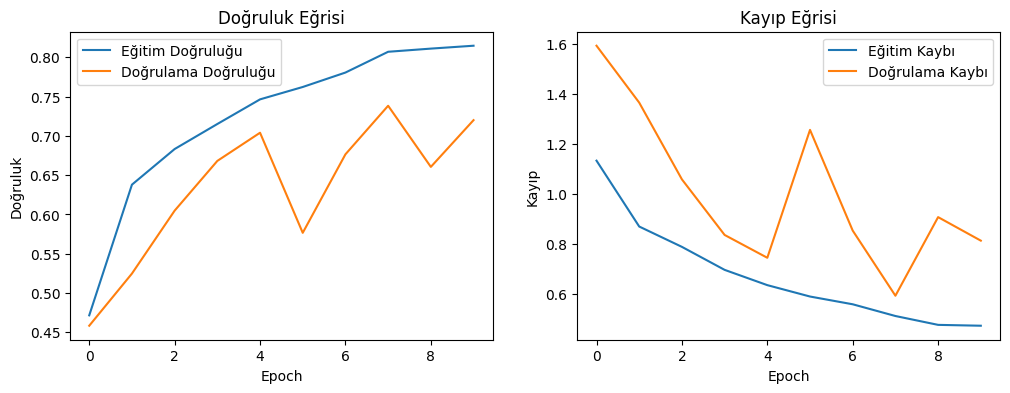

In [45]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Eğrisi')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Eğrisi')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

In [46]:
# Tahminleri alma
test_generator.reset()
VALIDATION_STEPS_PREDICT = math.ceil(test_generator.samples / BATCH_SIZE)

Y_pred = model.predict(test_generator, steps=VALIDATION_STEPS_PREDICT)
y_pred = np.argmax(Y_pred, axis=1)

# Gerçek etiketleri alma (Tahmin edilen uzunluğa göre true etiketleri alırız)
y_true = test_generator.classes[:len(y_pred)]

# Sınıf isimlerini alma
class_labels = list(test_generator.class_indices.keys())

# Karmaşıklık Matrisi
print('--- Karmaşıklık Matrisi (Confusion Matrix) ---')
print(confusion_matrix(y_true, y_pred))

# Sınıflandırma Raporu
print('\n--- Sınıflandırma Raporu (Classification Report) ---')
print(classification_report(y_true, y_pred, target_names=class_labels))

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 301ms/step
--- Karmaşıklık Matrisi (Confusion Matrix) ---
[[157  52  18  73]
 [  4 110 118  74]
 [  2   0 401   2]
 [  2   0  22 276]]

--- Sınıflandırma Raporu (Classification Report) ---
              precision    recall  f1-score   support

      glioma       0.95      0.52      0.68       300
  meningioma       0.68      0.36      0.47       306
     notumor       0.72      0.99      0.83       405
   pituitary       0.65      0.92      0.76       300

    accuracy                           0.72      1311
   macro avg       0.75      0.70      0.68      1311
weighted avg       0.75      0.72      0.70      1311

